#### 4.5.3 Iterative feature selection (반복적 특성 선택)
- 첫번째 방법
  - 특성을 선택하지 않은 상태에서 어떤 종료 조건에 도달할 때까지 새로운 특성을 하나씩 선택하는 방법
- 두번째 방법
  - 모든 특성을 선택한 상태에서 어떤 종료 조건에 도달할 때까지 특성을 하나씩 제거하는 방법
  - 재귀적 특성 제거(Recursive Feature Elimination, RFE)
    - feature_selection.RFE(model, n_features_to_select)
      - 1) 전체 특성을 활용하여 주어진 model을 만듦.
      - 2) 특성 중요도가 가장 낮은 특성부터 제거
      - 3) 제거한 특성을 제외하고 다시 1)로 이동하여 model을 새롭게 만듦
      - 특성의 개수가 n_features_to_select로 남을때 까지 위와 같은 과정 반복 

In [53]:
from sklearn.feature_selection import RFE
select = RFE(
    RandomForestClassifier(n_estimators=100, random_state=42),
    n_features_to_select=40
)

select.fit(X_train, y_train)
X_train_rfe = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_rfe.shape: {}".format(X_train_rfe.shape))

X_train.shape: (284, 80)
X_train_rfe.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False False False
 False False False False False False False False False False False  True
  True False  True False False  True  True False False False  True False
 False False False False False  True False  True False False False False
 False  True False False False  True False False]
[16]


([], <a list of 0 Text yticklabel objects>)

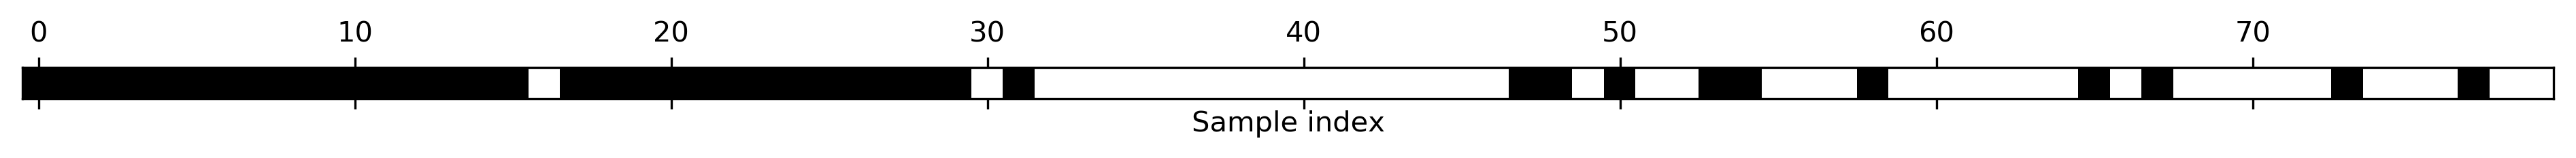

In [54]:
# visualize the selected features:
mask = select.get_support()
print(mask)

# 30보다 작거나 같은 인덱스
print([x for x in np.where(mask == False)[0].tolist() if x < 30])

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [55]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


In [56]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951
